$\color{#550000}{\text{Mysteries of TensorFlow}}$

* *notes on* <a href="https://www.tensorflow.org/tutorials/generative/deepdream"> deep dream </a>

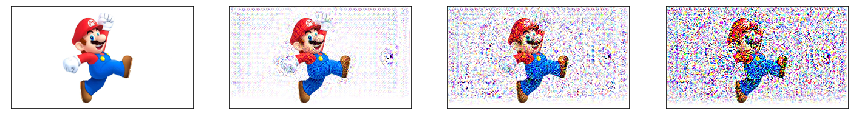

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

image_url = 'https://cdn.vox-cdn.com/thumbor/Yt1avchDkHqEqJuhYZ3YjKF3kFc=/0x0:1700x960/1200x675/filters:focal(714x344:986x616)/cdn.vox-cdn.com/uploads/chorus_image/image/57514059/mario.0.jpg'

image_name  = image_url.split('/')[-1]
image_path  = tf.keras.utils.get_file(image_name, origin=image_url)
image_img   = PIL.Image.open(image_path); image_img.thumbnail((300,300));
image_array = np.array(image_img, dtype='float32')/255
image_tensor= tf.convert_to_tensor(image_array)
image_tensor= tf.expand_dims(image_tensor, axis=0)

inception_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

dream_model = tf.keras.Model(
    inputs  = inception_model.input,
    outputs = [inception_model.get_layer(L).output for L in ['mixed3', 'mixed4']])

fig,ax = plt.subplots(1,4, figsize=[15,15], subplot_kw={'xticks':[],'yticks':[]})

for step in range(4):  
    
    with tf.GradientTape() as g:
        g.watch(image_tensor)
        activations = dream_model(image_tensor)
        loss = tf.reduce_sum([tf.math.reduce_mean(a) for a in activations])
        
    gradients = g.gradient(loss, image_tensor)
    gradients /= tf.math.reduce_std(gradients)
    
    image_tensor += .1*step*gradients
    image_tensor = tf.clip_by_value(image_tensor, 0, 1)
    
    ax[step].imshow(image_tensor.numpy()[0,:,:,:])
    
plt.show()